/Volumes/SSD_01/00_Python課程專用/PythonAI_Web_20231217/D91_書籍範例/02_Python:加密貨幣CTA量化交易111個實戰技巧/範例程式碼_20231218/historical_data.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old_ts = file_data.iloc[-1][0]
/Users/samhsiao/Documents/PythonVenv/envDash/lib/python3.10/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


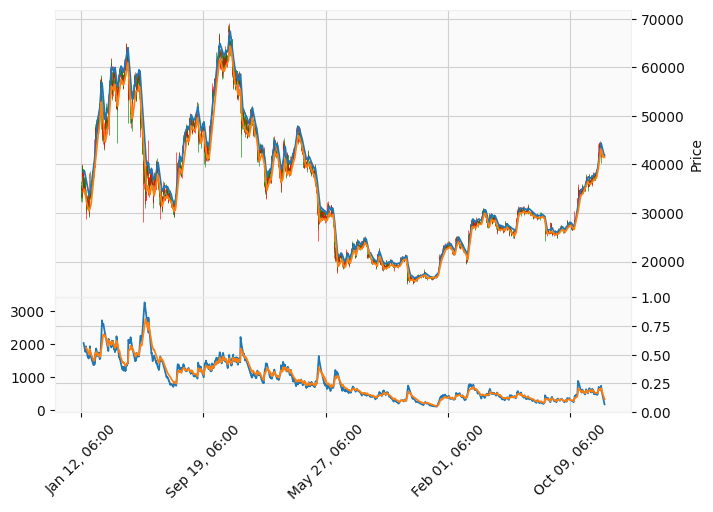

In [1]:
from historical_data import get_klines_df
from talib.abstract import SMA, ATR
import mplfinance as mpf

# 取得歷史資料
symbol = "BTCBUSD"
interval = "6h"
klines = get_klines_df(symbol, interval)

# 繪製K線圖
data = klines.copy()
data["atr_short"] = ATR(data, timeperiod=20)
data["atr_long"] = ATR(data, timeperiod=40)
data["atr_upper"] = SMA(data, timeperiod=20) + ATR(data, timeperiod=20)
data["atr_lower"] = SMA(data, timeperiod=20) - ATR(data, timeperiod=20)

addp = []
addp.append(mpf.make_addplot(data["atr_short"], secondary_y=True, panel=1))
addp.append(mpf.make_addplot(data["atr_long"], secondary_y=True, panel=1))
addp.append(mpf.make_addplot(data["atr_upper"]))
addp.append(mpf.make_addplot(data["atr_lower"]))

mcolor = mpf.make_marketcolors(up="r", down="g", inherit=True)
mstyle = mpf.make_mpf_style(base_mpf_style="yahoo", marketcolors=mcolor)
mpf.plot(data, style=mstyle, addplot=addp, type="candle")
